### Retention (잔존율)
* 모바일게임 로그분석을 통해 고객 유지율을 높이자
* AB test (양집단 비교)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./데이터수집/data/mobile_log.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [4]:
df['version'].value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

In [6]:
df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

<AxesSubplot:ylabel='sum_gamerounds'>

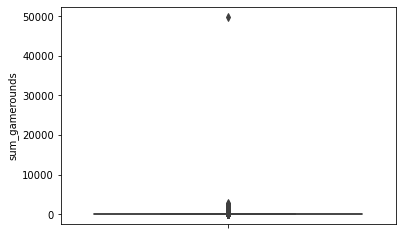

In [9]:
# sum_gamerounds의 boxplot
sns.boxplot(data=df, y='sum_gamerounds')

In [18]:
df[df['sum_gamerounds']> 4000]

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True


<AxesSubplot:ylabel='sum_gamerounds'>

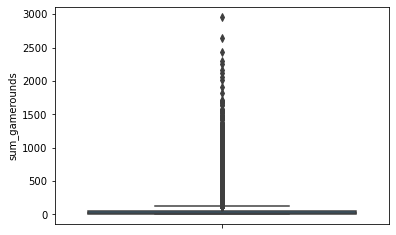

In [19]:
df = df[df['sum_gamerounds'] < 40000]
sns.boxplot(data=df, y='sum_gamerounds')

In [20]:
# sum_gamerounds별 사용자 수
df.groupby('sum_gamerounds')['userid'].count()

sum_gamerounds
0       3994
1       5538
2       4606
3       3958
4       3629
        ... 
2251       1
2294       1
2438       1
2640       1
2961       1
Name: userid, Length: 941, dtype: int64

<AxesSubplot:xlabel='sum_gamerounds'>

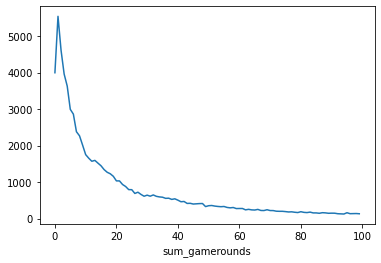

In [25]:
df.groupby('sum_gamerounds')['userid'].count()[:100].plot()

In [27]:
df['retention_1'].value_counts()

False    50035
True     40153
Name: retention_1, dtype: int64

In [29]:
df['retention_1'].mean() # 44.5%가 들어왔음

0.4452144409455803

In [31]:
# 게이트별 1일 리텐션 평균
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448198
gate_40    0.442283
Name: retention_1, dtype: float64

In [32]:
# 7일 리텐션
df['retention_7'].mean()

0.1860557945624695

In [33]:
df.groupby('version')['retention_7'].mean()

version
gate_30    0.190183
gate_40    0.182000
Name: retention_7, dtype: float64

### T-test

In [34]:
df_30 = df[df['version']=='gate_30']
df_40 = df[df['version']=='gate_40']

In [36]:
df_30.shape, df_40.shape

((44699, 5), (45489, 5))

In [37]:
# 등분산검정
import scipy as sp
sp.stats.levene(df_30['retention_1'], df_40['retention_1']) # pvalue가 0.05보다 크므로 등분산 만족

LeveneResult(statistic=3.1937812288101903, pvalue=0.07392220630215537)

In [38]:
# T-test 
from scipy import stats
stats.ttest_ind(df_30['retention_1'], df_40['retention_1']) # 1일

Ttest_indResult(statistic=1.7871153372992439, pvalue=0.07392220630182521)

In [ ]:
# 통계값이 양수면 왼쪽이 더 큼
# pvalue가 0.05보다 크므로 유의미한 차이는 없다.

In [40]:
stats.ttest_ind(df_30['retention_7'], df_40['retention_7']) # 7일 리텐션

Ttest_indResult(statistic=3.1575495965685936, pvalue=0.0015915357297854773)

In [41]:
# 통계값이 양수면 왼쪽이 더 큼
# pvalue가 0.05보다 작으므로 유의미한 차이가 있다.

### 카이제곱

In [43]:
# 분할표
pd.crosstab(df['version'], df['retention_7'])

retention_7,False,True
version,,
gate_30,36198,8501
gate_40,37210,8279


In [47]:
df.groupby('version')[['retention_1', 'retention_7']].sum() # True의 개수만 나옴

,retention_1,retention_7
version,,
gate_30,20034,8501
gate_40,20119,8279


In [48]:
df.groupby('version')[['retention_1', 'retention_7']].count()

,retention_1,retention_7
version,,
gate_30,44699,44699
gate_40,45489,45489


In [51]:
'''
retention_1
       성공    실패
g30
g40
'''
r1 = np.array([
    [20034, 44699-20034],
    [20119, 45489-20119]
])
stats.chi2_contingency(r1)

(3.169835543170799,
 0.07500999897705693,
 1,
 array([[19900.64029583, 24798.35970417],
        [20252.35970417, 25236.64029583]]))

In [52]:
# pvalue:0.07 이므로 상관관계가 있다고 말할 수 없다

In [53]:
r2 = np.array([
    [8501, 44699-8501],
    [8279, 45489-8279]
])
stats.chi2_contingency(r2)

(9.915275528905669,
 0.0016391259678654423,
 1,
 array([[ 8316.50796115, 36382.49203885],
        [ 8463.49203885, 37025.50796115]]))

In [ ]:
# pvalue:0.001 이므로 상관관계가 있다 (유의확률 0.1%)
# 게이트 : 30에 두느냐, 40에 두느냐는 7일 리텐션에 영향이 있다.
# 게이트 30에 두는게 좋다